# Simple model test

In [1]:
from utils import import_df
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, accuracy_score
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

df = import_df("6-feature-extractor-output.json")
df = df.set_index(["machine", "day"])
df

s_00_mean  s_01_mean  s_02_mean  s_03_mean  s_04_mean  s_05_mean  \
machine day                                                                     
0       1    -0.001947  -5.549816  -6.343277  -3.904963  -1.998774  -1.069093   
        2     0.167453  -5.678774  -7.037282  -4.230672  -2.211472  -0.920225   
        3     0.380043  -5.032054  -6.038568  -3.626030  -1.898269  -0.999874   
        4     0.198066  -5.081425  -6.535374  -3.857881  -1.831103  -0.993642   
        5     0.553147  -5.264652  -6.281117  -3.865195  -2.075699  -1.060344   
...                ...        ...        ...        ...        ...        ...   
105     2     0.047343   2.309075   0.423002   0.186544  -0.102140   0.155907   
        3     0.210205   2.038600   0.561938  -0.066546  -0.008159   0.136436   
        4     0.030131   3.533007   0.503776  -0.200716  -0.043963   0.093916   
        5    -0.167016   3.362541   0.796831  -0.215927   0.209059   0.053554   
        6     0.152481   1.915876   0.378458  -0.054436  -0.216293   0.067644   

             s_06_mean  s_07_mean  s_08_mean  s_09_mean  ...  vib_z_acc_cd  \
machine day                                              ...                 
0       1    -0.877743  -0.094395  -0.089302  -0.149012  ...      1.440183   
        2    -1.089935  -0.001527  -0.105820  -0.017330  ...      1.362753   
        3    -1.087981  -0.028880  -0.202542   0.252725  ...      1.893666   
        4    -1.106345   0.051811   0.006952  -0.015457  ...      1.586002   
        5    -0.915790  -0.098523  -0.050948  -0.097805  ...      1.644742   
...                ...        ...        ...        ...  ...           ...   
105     2     0.306906   0.007380  -0.174601   0.065381  ...      0.819198   
        3     0.124453  -0.111902  -0.119110  -0.030486  ...      0.946684   
        4     0.126681  -0.130412  -0.086135  -0.076083  ...      1.227801   
        5     0.281593  -0.155349  -0.132261   0.099689  ...      0.981046   
        6     0.199792  -0.039129  -0.189876  -0.006981  ...      1.294920   

             vib_z_kurt_cd  vib_z_peak_cd  vib_z_vel_cd  current_cd  \
machine day                                                           
0       1         0.277093       0.462698      3.196192    3.963271   
        2         0.013217       0.630779      1.657707    3.933538   
        3         0.538087       0.772260      1.775864    3.936720   
        4         0.107214       0.515229      1.670386    3.960426   
        5         0.231594       0.286890      1.229940    3.967005   
...                    ...            ...           ...         ...   
105     2         0.857271       0.901137      1.176532    3.948734   
        3         1.215551       1.131651      1.476657    3.948333   
        4         0.928056       1.179521      0.595226    3.937353   
        5         0.766589       1.012357      0.873816    3.934514   
        6         0.705326       0.871427      1.642332    3.927149   

             kmeans_label_cd  bearing  magnet  electricity  rotor  
machine day                                                        
0       1                  1        0     0.0            0      0  
        2                  1        0     0.0            0      0  
        3                  1        0     0.0            0      0  
        4                  1        0     0.0            0      0  
        5                  1        0     0.0            0      0  
...                      ...      ...     ...          ...    ...  
105     2                  2        0     0.0            0      0  
        3                  2        0     0.0            0      0  
        4                  0        0     0.0            0      0  
        5                  2        0     0.0            0      0  
        6                  1        0     0.0            0      0  

[636 rows x 461 columns]

("knn", role="std"),

("logistic", role="std"),

("lda", role="std"),

("svm", role="std"),

("knn", role="magnet"),

("svm", role="magnet"),

("ridge", role="magnet"),


In [2]:
target = ["bearing", "electricity"]
df_labels = df[target]
df_features = df.drop(target, axis=1)
df_labels

bearing  electricity
machine day                      
0       1          0            0
        2          0            0
        3          0            0
        4          0            0
        5          0            0
...              ...          ...
105     2          0            0
        3          0            0
        4          0            0
        5          0            0
        6          0            0

[636 rows x 2 columns]

In [3]:
def test_model(model):
    X = df_features.to_numpy()
    y = df_labels.to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    scores = []
    for i in tqdm(range(10, len(X_train), 5)):
        X_red = X[:i]
        y_red = y[:i]

        clf = MultiOutputClassifier(model).fit(X_red, y_red)
        pred = clf.predict(X_test)

        tp = (pred == y_test).sum()
        tp = tp / len(pred) / 2

        precision = precision_score(y_test, pred, average='macro', zero_division=1)
        f1 = f1_score(y_test, pred, average="macro", zero_division=1)
        acc = accuracy_score(y_test, pred)

        # scores.append((tp, precision, f1, acc))
        scores.append((f1, acc))
    return scores

def plot_scores(scores):
    # plt.plot(scores, label=["True postive rate", "Precision", "F1", "Accuracy"])
    plt.figure(figsize=(8,5))
    plt.plot(scores, label=["F1", "Accuracy"])
    plt.legend()
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

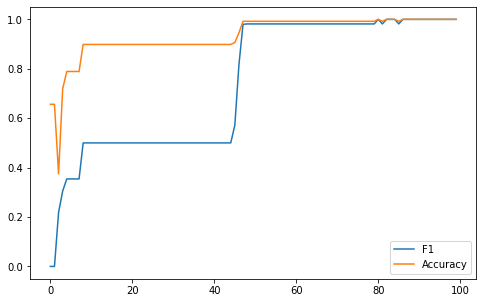

In [4]:
model = RandomForestClassifier(random_state=1)
scores = test_model(model)
plot_scores(scores)

  0%|          | 0/100 [00:00<?, ?it/s]

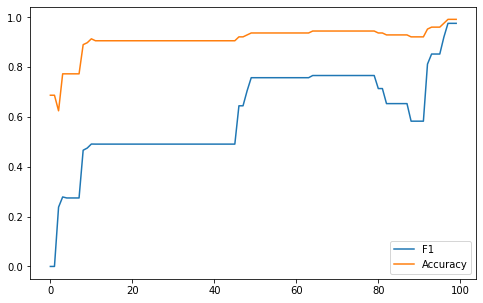

In [9]:
model = KNeighborsClassifier(n_neighbors=3)
scores = test_model(model)
plot_scores(scores)